# Lyapunov Proof Visualized

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams['text.usetex'] = True

class LyapunovAnalysis():

    def __init__(self, alpha_1, alpha_2, alpha_3, V, dotV, system):
        self.alpha_1 = alpha_1
        self.alpha_2 = alpha_2
        self.alpha_3 = alpha_3
        self.V = V
        self.dotV = dotV
        self.system = system

    def analysis(self):

        r_values = np.linspace(0, 2, 200)
        V_values = self.V(r_values)
        alpha_1_values = self.alpha_1(r_values)
        alpha_2_values = self.alpha_2(r_values)

        if np.all(alpha_1_values <= V_values) and np.all(V_values <= alpha_2_values):
            pass
        else:
            return False

        # Check alpha_3
        x_values = np.linspace(-2, 2, 400)
        dotV_values = self.dotV(x_values)
        alpha_3_values = [-self.alpha_3(abs(xp)) for xp in x_values]

        if np.all(dotV_values <= alpha_3_values):
            pass
        else:
            return False

        return True

    def plot_analysis(self):
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))

        r_values = np.linspace(0, 2, 200)
        axes[0].plot(r_values, self.alpha_1(r_values), 'r--', label=r'$\alpha_1(r)$')
        axes[0].plot(r_values, self.V(r_values), 'k-', label=r'$V(x)$')
        axes[0].plot(r_values, self.alpha_2(r_values), 'b--', label=r'$\alpha_2(r)$')

        axes[0].set_xlabel(r'$r = |x|$')
        axes[0].set_ylabel('Function value')
        axes[0].set_title(r'$\alpha_1(r) \le V(x)\le \alpha_2(r)$')
        axes[0].grid(True)
        axes[0].legend()

        t_span = np.linspace(0, 5, 200)
        initial_conditions = [2.0, 1.0, -1.5, 0.5]

        for x0 in initial_conditions:
            sol = odeint(self.system, x0, t_span)
            axes[1].plot(t_span, sol[:,0], label=rf'$x(0)={x0}$')

        axes[1].set_xlabel('t')
        axes[1].set_ylabel('x(t)')
        axes[1].set_title(r'Trajectories of $\dot{x}$')
        axes[1].grid(True)
        axes[1].legend()

        x_plot = np.linspace(-2, 2, 400)
        axes[2].plot(x_plot, self.dotV(x_plot), 'm-', linewidth=2, label=r'$\dot{V}(x)$')
        axes[2].plot(x_plot, [-self.alpha_3(abs(xp)) for xp in x_plot],
                'b--', label=r'$-\alpha_{3}(|x|)$')
        axes[2].axhline(0, color='k', linewidth=0.8)
        axes[2].set_xlabel('x')
        axes[2].legend()
        axes[2].grid(True)

        plt.tight_layout()
        plt.show()

The system
$$
\dot{x} = -x^{3}
$$
and, we are trying to proof that the equilibrium point $x=0$ is **locally asymptotically stable**. And follows
$$
\begin{aligned}
&\alpha_{1}(\lvert x\rvert)\le V(x)\le\alpha_{2}(\lvert x\rvert),\\
&\tfrac{\partial V}{\partial x}f(x)=\dot{V}(x)\le-\alpha_{3}(\lvert x\rvert),
\end{aligned}
$$

where each $\alpha_{i}$ is a continuous, positive‐definite function (i.e. in class $\mathcal{K}$ for $\alpha_{1},\alpha_{2}$ and at least nonnegative for $\alpha_{3}$).

The system is $ \dot{x} = -x^{3} $, and its only equilibrium is $x=0$. A convenient **Lyapunov function** candidate is $V(x) = x^{2}$.

For $r = |x|$, observe $ \tfrac{1}{2} r^2 \le x^2 \le 2r^2$ so a convenient choice is
$
\alpha_{1}(r) =\tfrac12r^{2},
\quad
\alpha_{2}(r) =2r^{2}.
$

Both of these are $\mathcal{K}$‐functions (continuous, strictly increasing for $r\ge0$, and $\alpha_{i}(0)=0$).

$
\dot{V}(x) = (2x)\bigl(-x^{3}\bigr) = -2x^{4}.
$
Hence
$
\dot{V}(x) = -2x^{4} 
\le
-2|x|^{4}.
$
Therefore we can pick
$
\alpha_{3}(r) =2r^{4},
$
which is again strictly positive for all $r>0$.  Notice
$
\dot{V}(x) = -2x^{4} \le -\bigl[2|x|^{4}\bigr] = -\alpha_{3}(|x|).
$

Because $\alpha_{3}(r)$ is “positive definite” on $r>0$ (it vanishes at $r=0$ and is $>0$ otherwise), the theorem guarantees **local asymptotic stability** of $x=0$.

The system is stable


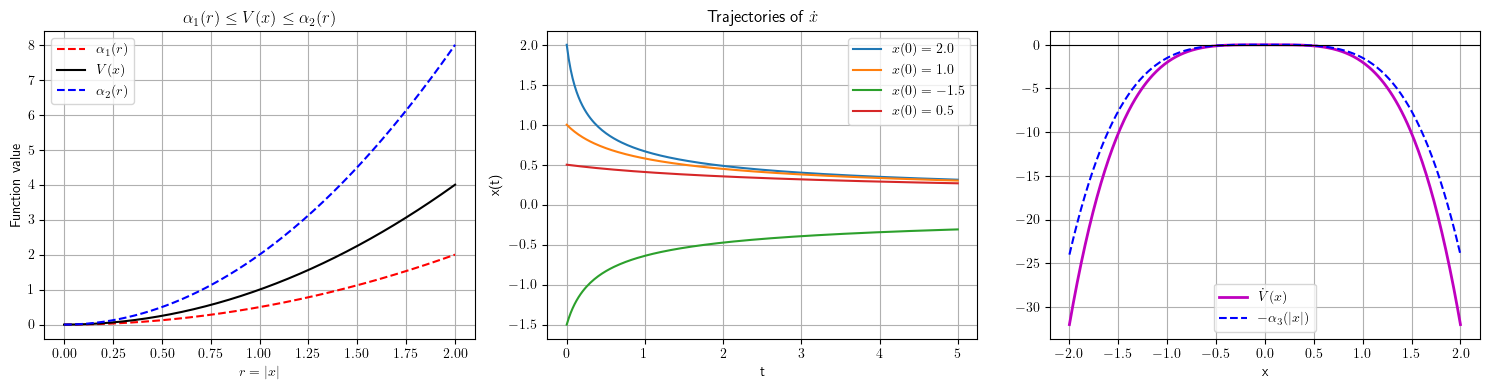

In [2]:
def system(x, t):
    """
    1D system: dot{x} = -x^3
    """
    return -x**3

def V(x):
    """
    Lyapunov function: V(x) = x^2
    """
    return x**2

def dotV(x):
    """
    dot{V}(x) = (dV/dx) * f(x) = 2x * (-x^3) = -2 x^4
    """
    return -2.0 * (x**4)

def alpha_1(r):
    return 0.5 * (r**2)

def alpha_2(r):
    return 2.0 * (r**2)

def alpha_3(r):
    return 1.5 * r**4



analyzer = LyapunovAnalysis(alpha_1, alpha_2, alpha_3, V, dotV, system)

if analyzer.analysis():
    print('The system is stable')
else:
    print('Stability could not be proven')

analyzer.plot_analysis()

---

Consider the simple system:
$$
\dot{x} = x,
$$
which has an equilibrium at $x=0$.  We take
$$
V(x) = x^{2}.
$$
As before, for $r=|x|$, notice that

$$
0.5r^2 \le x^2 \le 2r^2 \quad \Longleftrightarrow \quad 0.5|x|^2 \le V(x) \le 2|x|^2.
$$

Hence a suitable bounding is

$$
\alpha_1(r) = 0.5r^2, \quad \alpha_2(r) = 2.0r^2.
$$

They satisfy $\alpha_1(|x|) \le V(x) \le \alpha_2(|x|)$ for all $x$.

### Derivative of $V$

$$
\dot{V}(x) = \frac{d}{dt}\bigl[x^2\bigr] = 2x\dot{x} = 2x(x) = 2x^{2} \ge 0.
$$

Although $V(x)$ is still “positive definite” in the sense $V(x)=x^2>0$ for $x\neq0$ and $V(0)=0$, you will see that **$\dot{V}(x)\ge0$** (not $\le0$), giving no guarantee of stability.  In fact, the equilibrium is **repelling**, so small perturbations cause solutions to move away from $0$.
This indicates that $V(x)$ is **nondecreasing** along trajectories.  Indeed, for any $x\neq0$, $\dot{V}(x)=2x^2>0$, so the equilibrium $x=0$ is **unstable**—perturbations grow exponentially.

Stability cannot be guaranteed


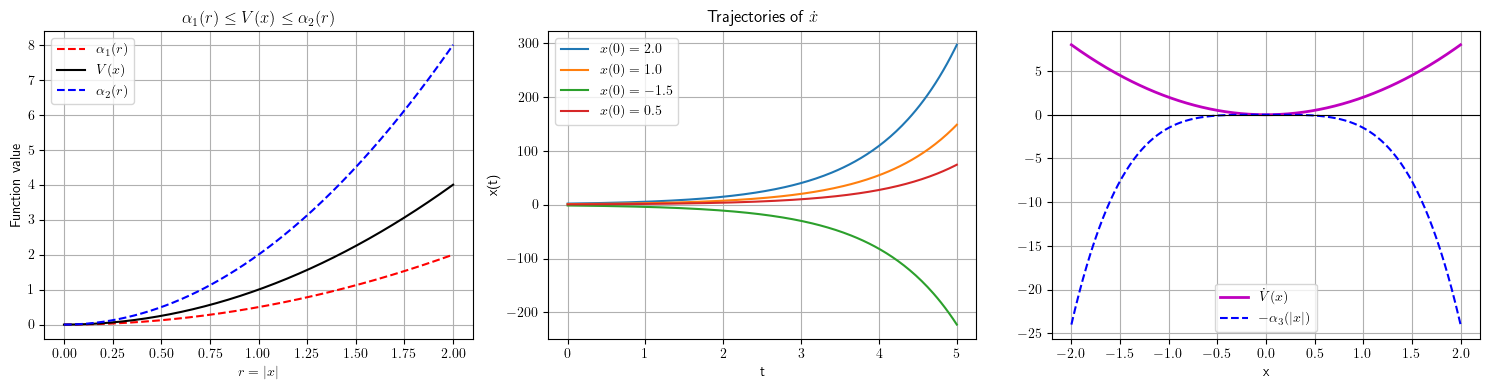

In [3]:
def system(x, t):
    """
    1D system: dot{x} = x
    """
    return x

def V(x):
    """
    Candidate Lyapunov function: V(x) = x^2
    """
    return x**2

def dotV(x):
    """
    dot{V}(x) = (dV/dx)*f(x) = 2x * x = 2x^2 >= 0
    """
    return 2.0 * x**2

# 2) Define alpha_1(r) and alpha_2(r)
def alpha_1(r):
    return 0.5 * (r**2)

def alpha_2(r):
    return 2.0 * (r**2)

def alpha_3(r):
    return 1.5 * r**4

analyzer = LyapunovAnalysis(alpha_1, alpha_2, alpha_3, V, dotV, system)

if analyzer.analysis():
    print('The system is stable')
else:
    print('Stability cannot be guaranteed')

analyzer.plot_analysis()